## Importing libaries

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering


# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

from src.support_eda import plot_relation_tv
from src.support_clustering import *

## Clustering using K-means

---

## Importing libaries

In [2]:
# Data processing  
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Pandas options  
# -----------------------------------------------------------------------
pd.options.display.max_colwidth = None

# Path configuration for custom module imports
# -----------------------------------------------------------------------
import sys
sys.path.append('../')  # Adds the parent directory to the path for custom module imports

# Ignore warnings  
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Custom functions and classes
# -----------------------------------------------------------------------
from src.support_preprocess import preprocess

## Data loading and preprocess

In [3]:
df = pd.read_csv('../data/raw/WrestlingWorldTournament.csv', index_col=0)

df.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [4]:
cols = ['name', 'sports', 'year_start', 'federation']

encoding_methods = {"onehot": ['gender'],
                    "target": [],
                    "ordinal" : {},
                    "frequency": ['nationality']
                    }

df_encoded, df_scaled = preprocess(df, encoding_methods, "minmax", columns_drop=cols)

---

Kmeans

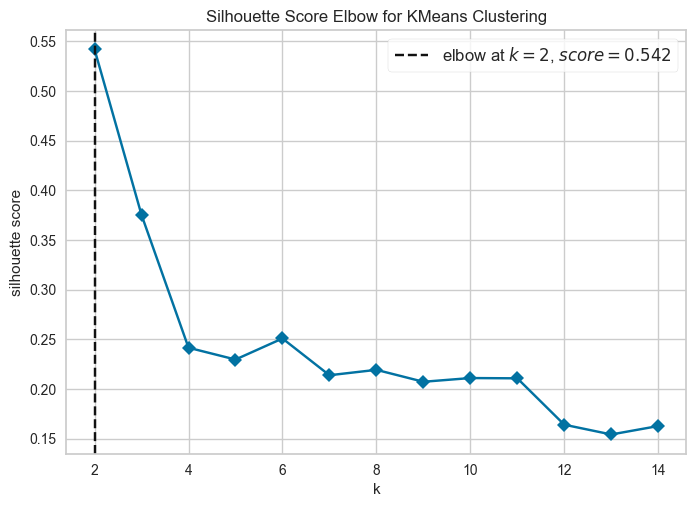

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [5]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=False)
visualizer.fit(df_scaled)
visualizer.show()

Según nuestros datos lo óptimo son 2 clusters. El silhouette score tiene un valor de 0.48, por lo que es razonablemente bueno. Más cercano a 1 serían unos clusters más definidos.

Ejecutaremos ahora el algoritmo K-means con 2 clusters

In [6]:
model_kmeans = KMeans(n_clusters=2)

km_fit = model_kmeans.fit(df_scaled)
labels = km_fit.labels_

### Metrics

In [7]:
def clustering_metrics(df, labels):

    print("Esta función está por ver si es definitiva")

    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)

    unique, counts = np.unique(labels, return_counts=True)
    cardinality = dict(zip(unique, counts))

    df_metrics = pd.DataFrame({
                        "silhouette_score": silhouette,
                        "davies_bouldin_index": davies_bouldin,
                        "cardinality": cardinality
                        })
    
    return df_metrics

In [8]:
clustering_metrics(df_scaled, labels)

Esta función está por ver si es definitiva


,silhouette_score,davies_bouldin_index,cardinality
0,0.541864,0.743419,265
1,0.541864,0.743419,235


Ahora veamos las características de cada cluster para ver cómo lo podemos interpretar

In [9]:
df_kmeans = df_scaled.copy()

df_kmeans['cluster'] = km_fit.labels_

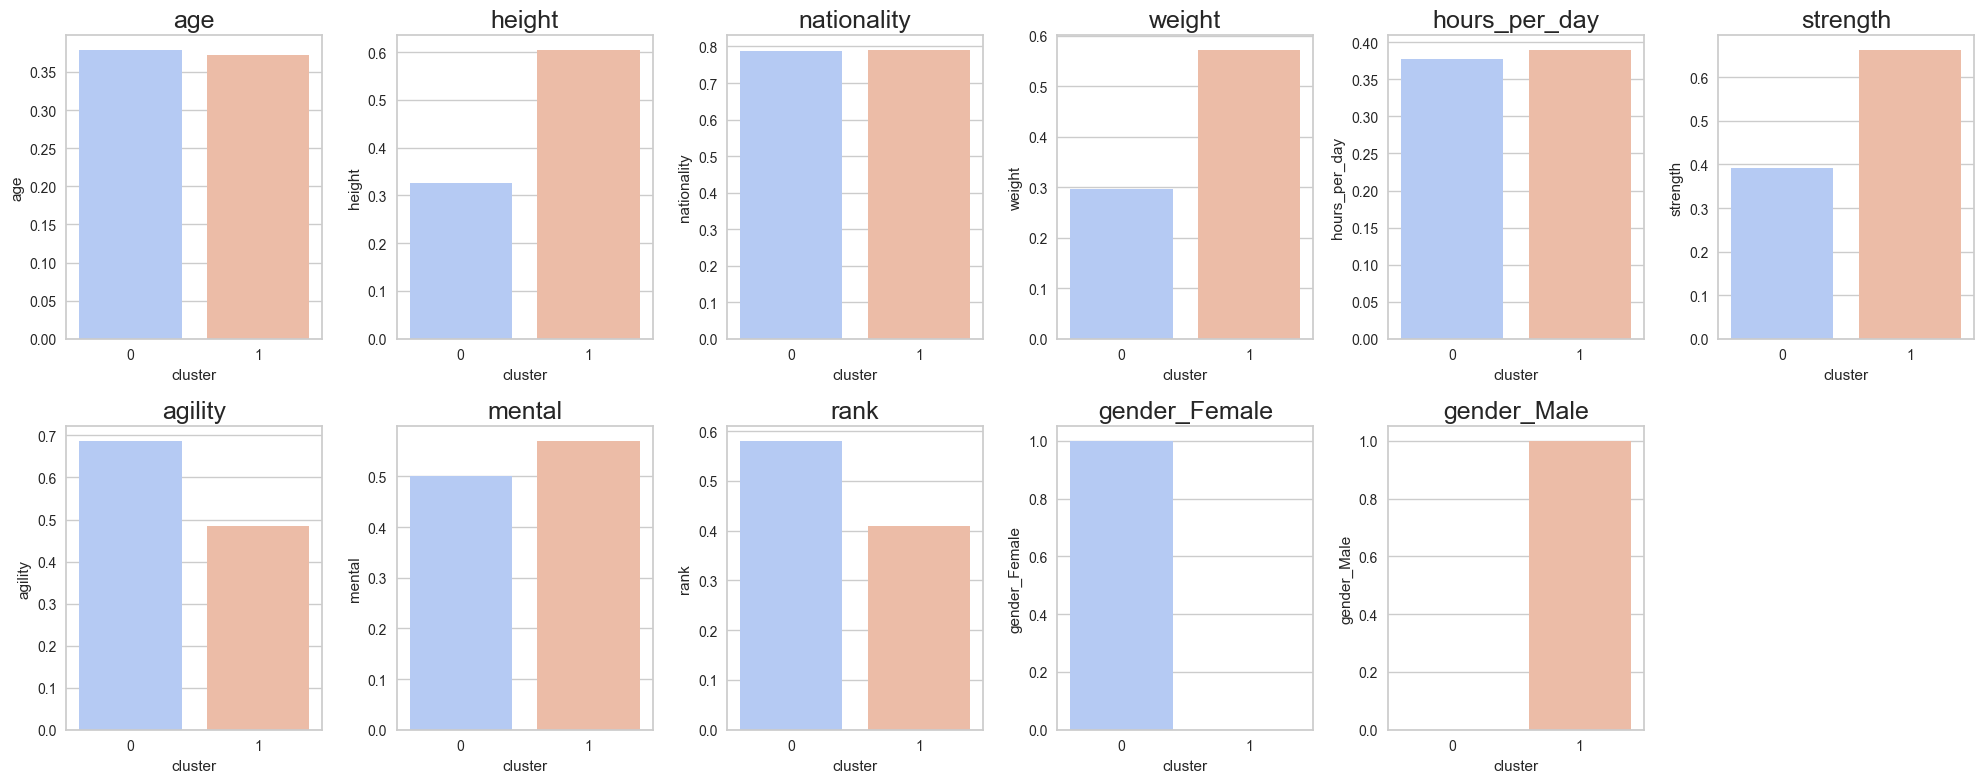

In [10]:
plot_clusters(df_kmeans)

Vemos claramente que se han clasificado según el género

Hagamos un radar plot

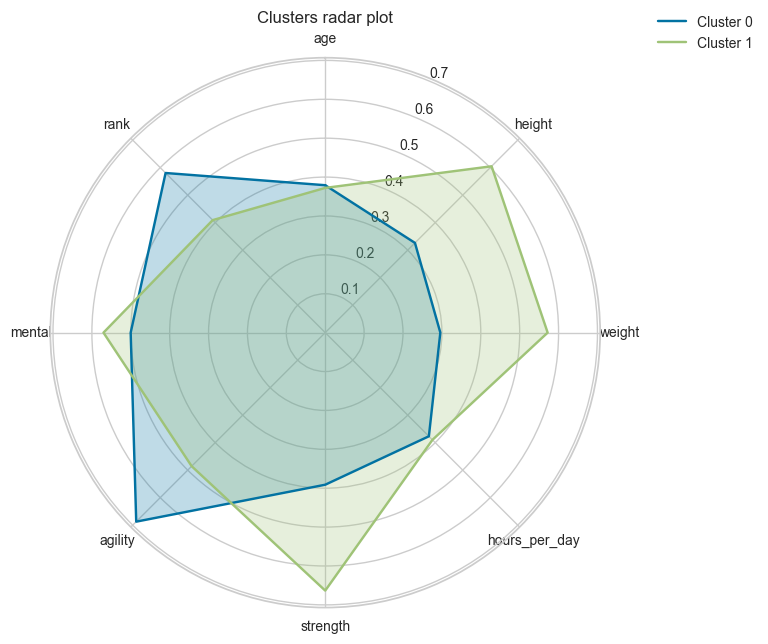

In [11]:
# Variables que deseas incluir en el radar plot
variables = ['age',
            'height',
            'weight',
            'hours_per_day',
            'strength',
            'agility',
            'mental',
            'rank']

plot_radar(df_kmeans, variables)

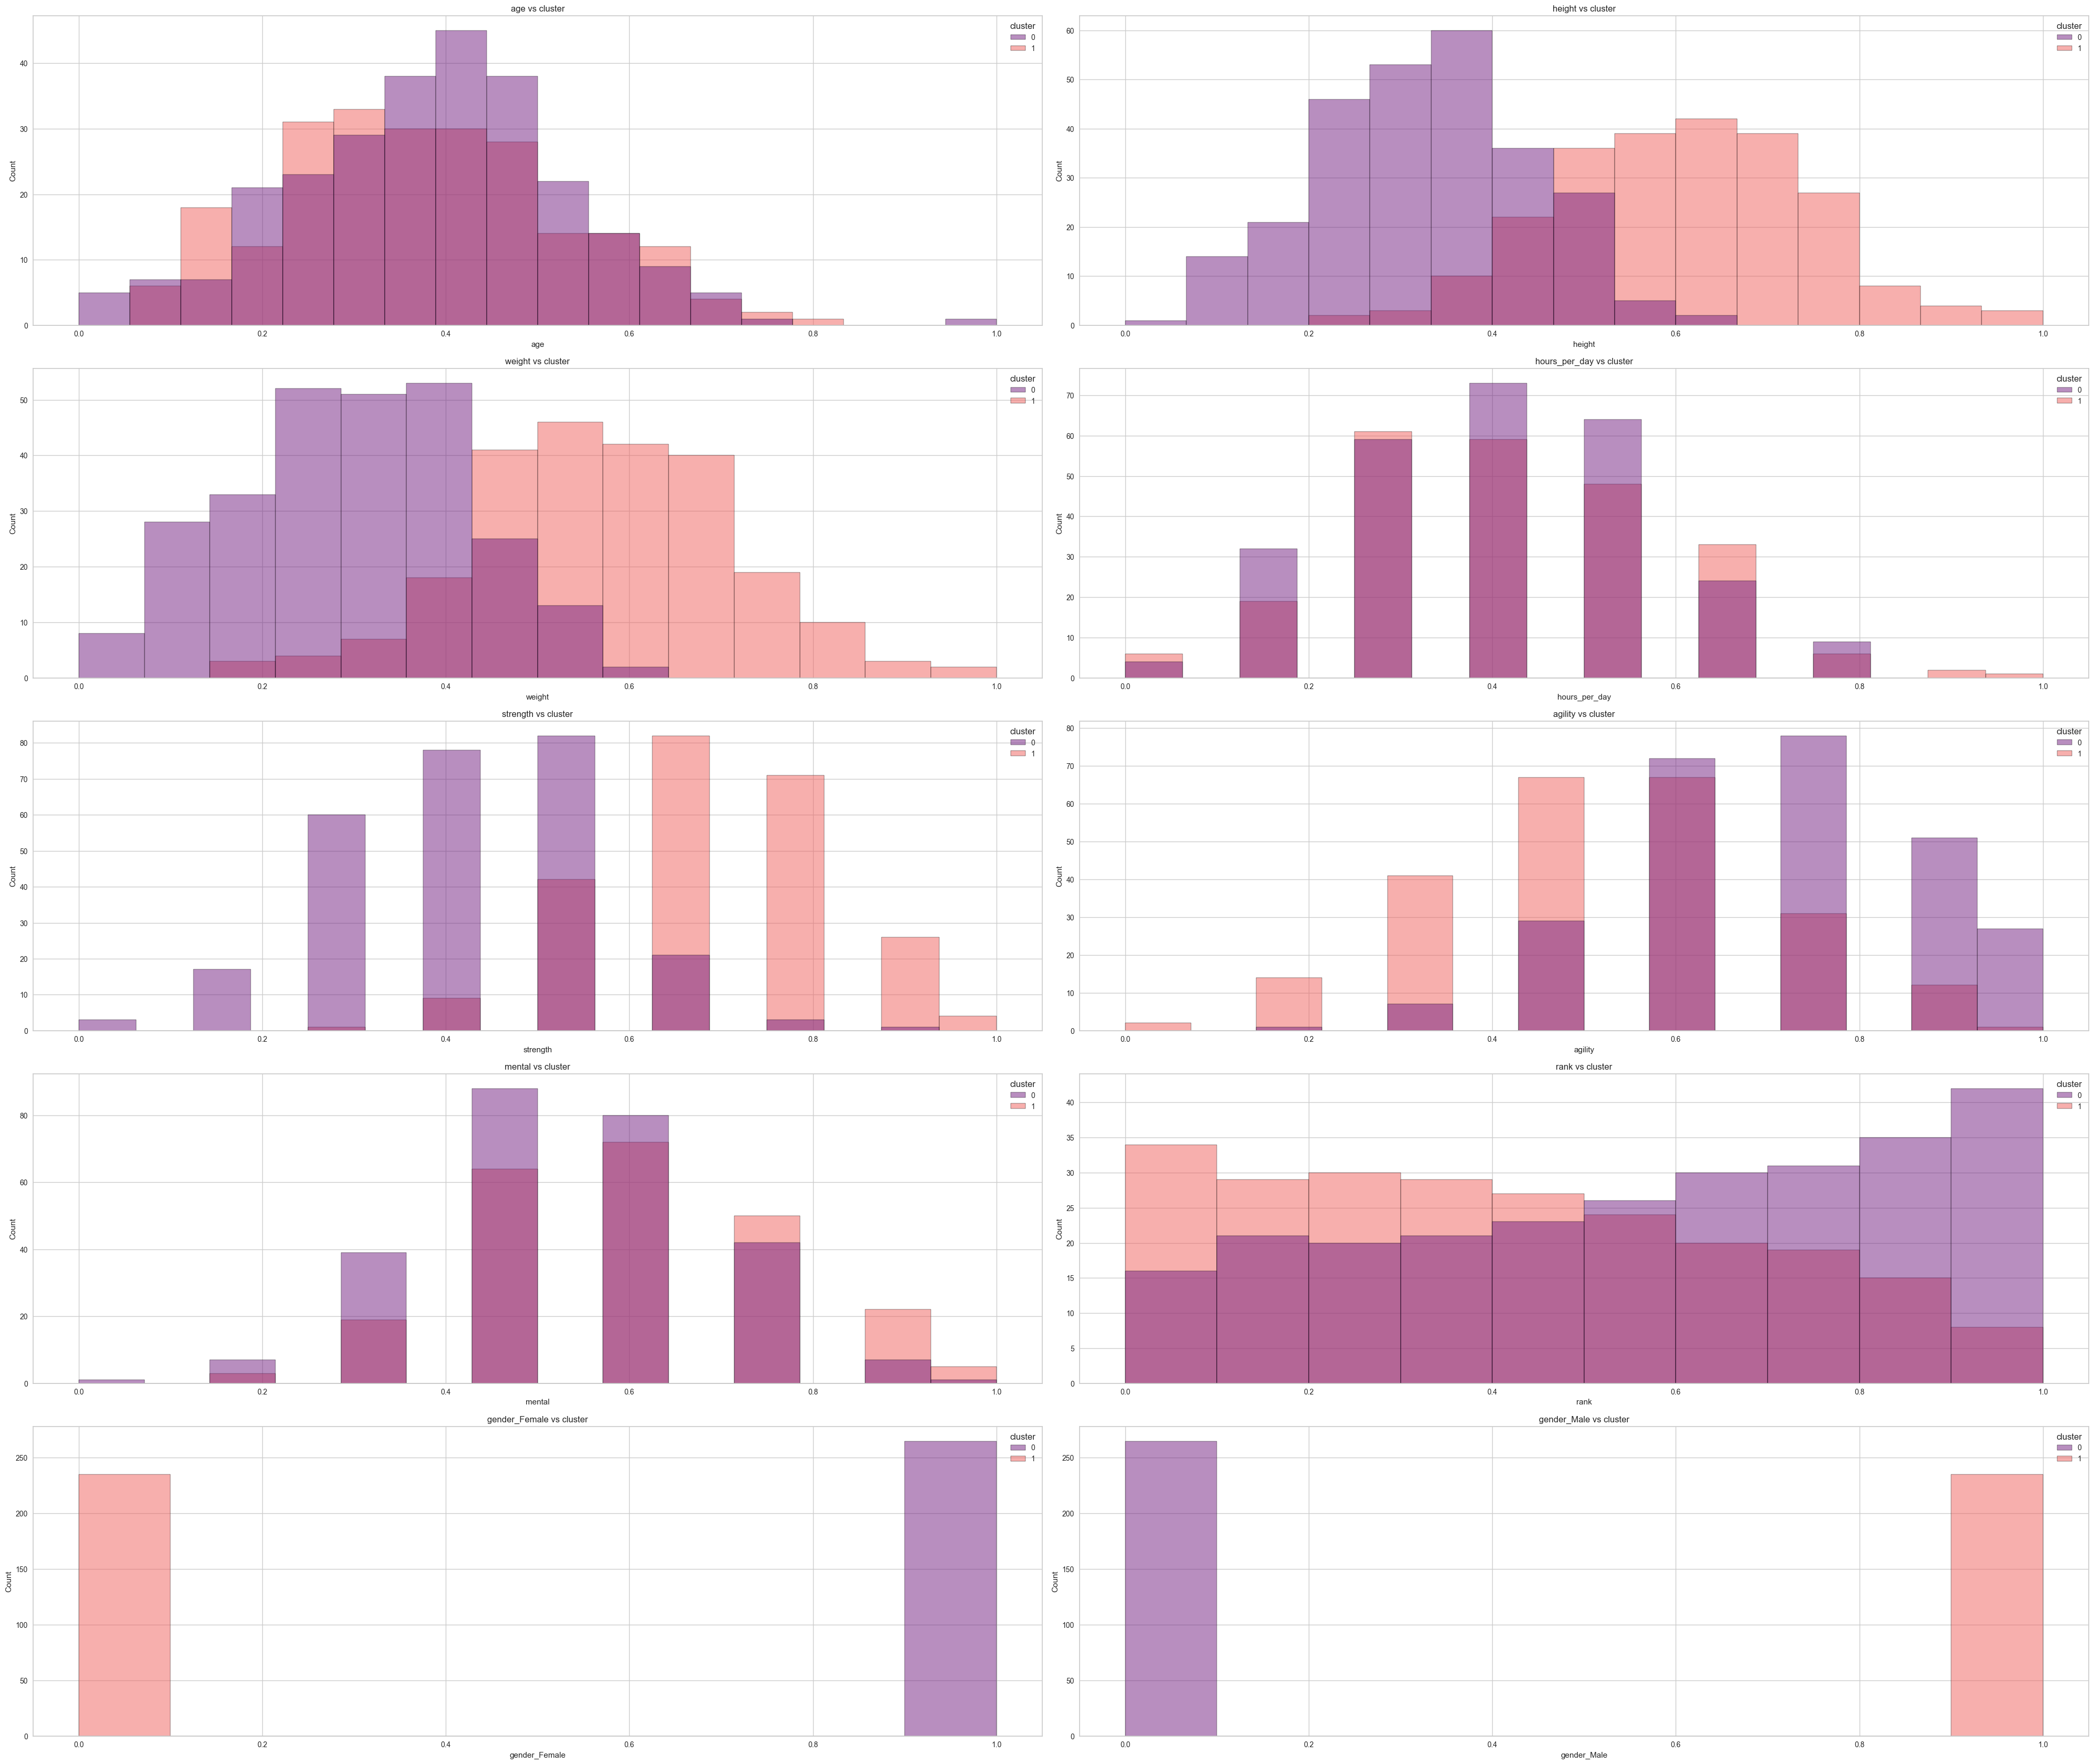

In [12]:
plot_relation_tv(df_kmeans.drop(columns=['nationality']), 'cluster', size=(40, 40), n_cols = 2)

Vemos en los resultados que efectivamente se corresponde con el análisis inicial que habíamos considerado.

En estos gráficos se aprecia mejor la diferencia en distribución de `rank`, `strength`, `height` y `weight`, con ligeras diferencias en el resto de variables.

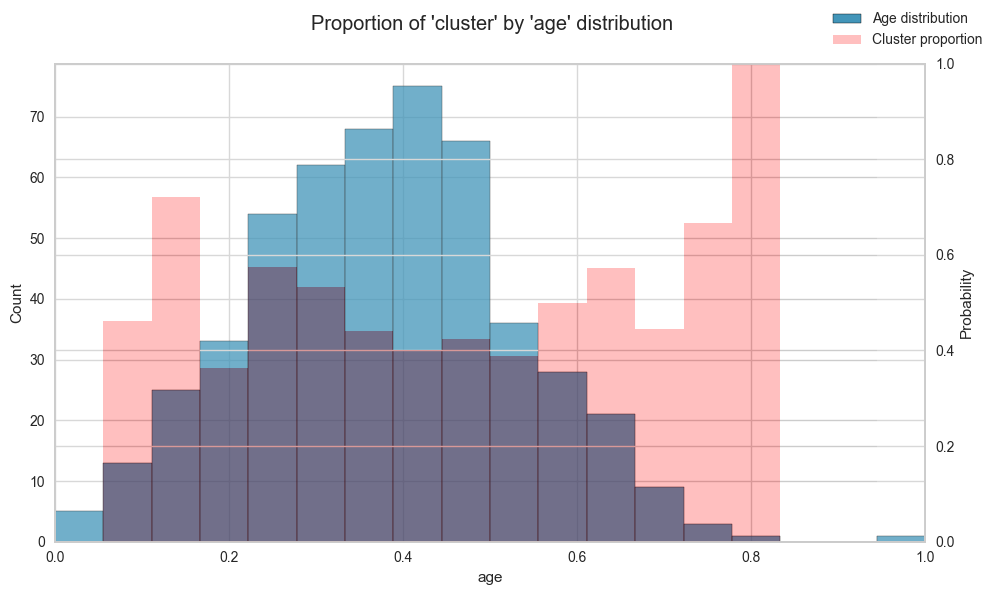

In [13]:
plot_combined_target_distribution(df_kmeans, 'cluster', 'age', size=(10, 6))

---

### Agglomerative clustering

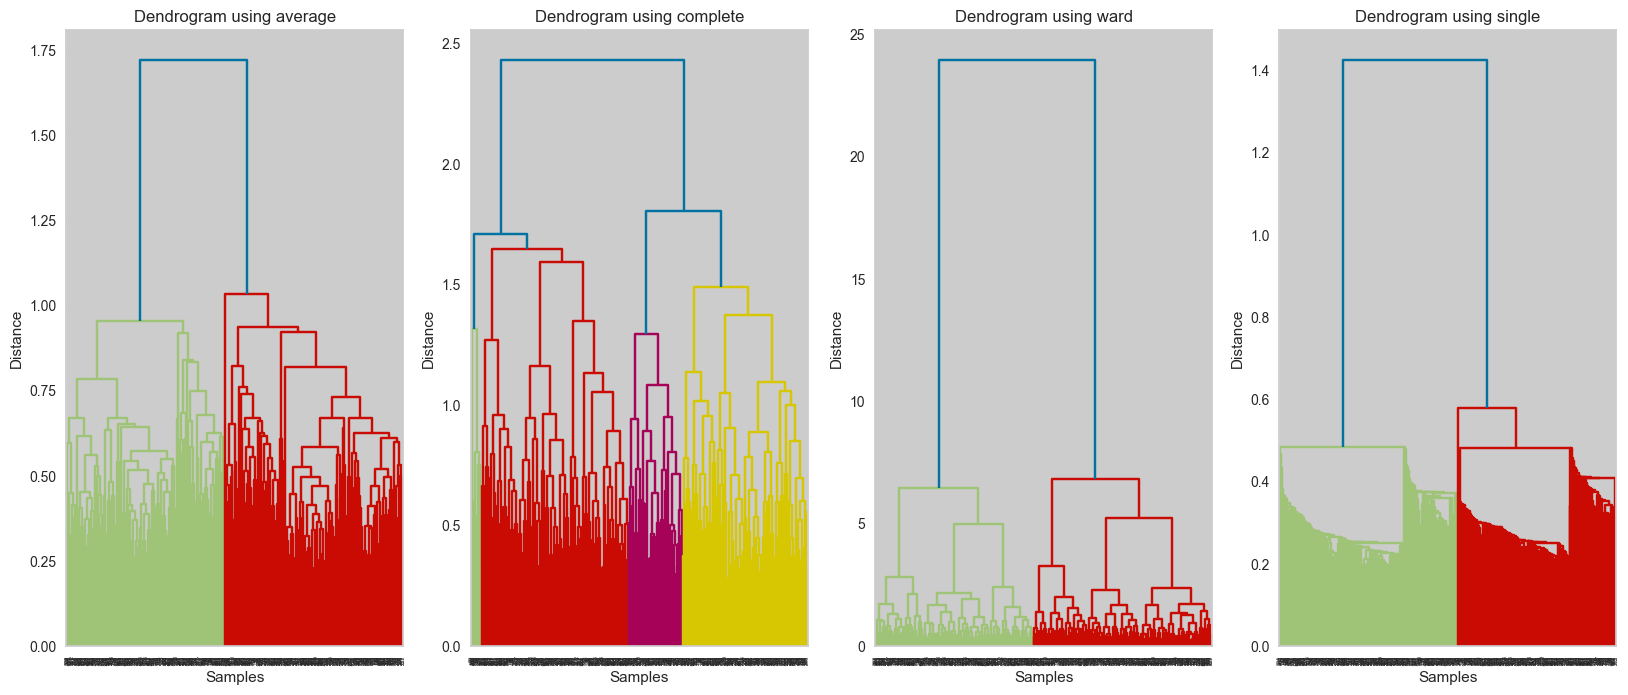

In [14]:
df_copia = df_scaled.copy()

plot_dendrogram(df_copia)

Según el método `complete` tenemos 4 clusters, mientras que el resto de métodos nos proporcionan 2. Utilizando el algoritmo `K-means` habíamos obtenido 2 clusters diferenciados de forma que esto tiene sentido para nosotros.

In [15]:
results_df = agglomerative_methods(df_copia)

Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error with linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.


In [26]:
best_model = results_df.sort_values(by='ranking_score', ascending=False).iloc[0]

### Apply model

In [ ]:
model = AgglomerativeClustering(
    linkage=best_model['linkage'],
    metric=best_model['metric'],
    distance_threshold=None,
    n_clusters=best_model['n_cluster']
)

agglo_fit = model.fit(df_scaled)

In [38]:
clustering_metrics(df_scaled, labels)

Esta función está por ver si es definitiva


,silhouette_score,davies_bouldin_index,cardinality
0,0.541864,0.743419,265
1,0.541864,0.743419,235


In [39]:
df_agg = df_scaled.copy()
df_agg["cluster"] = agglo_fit.labels_

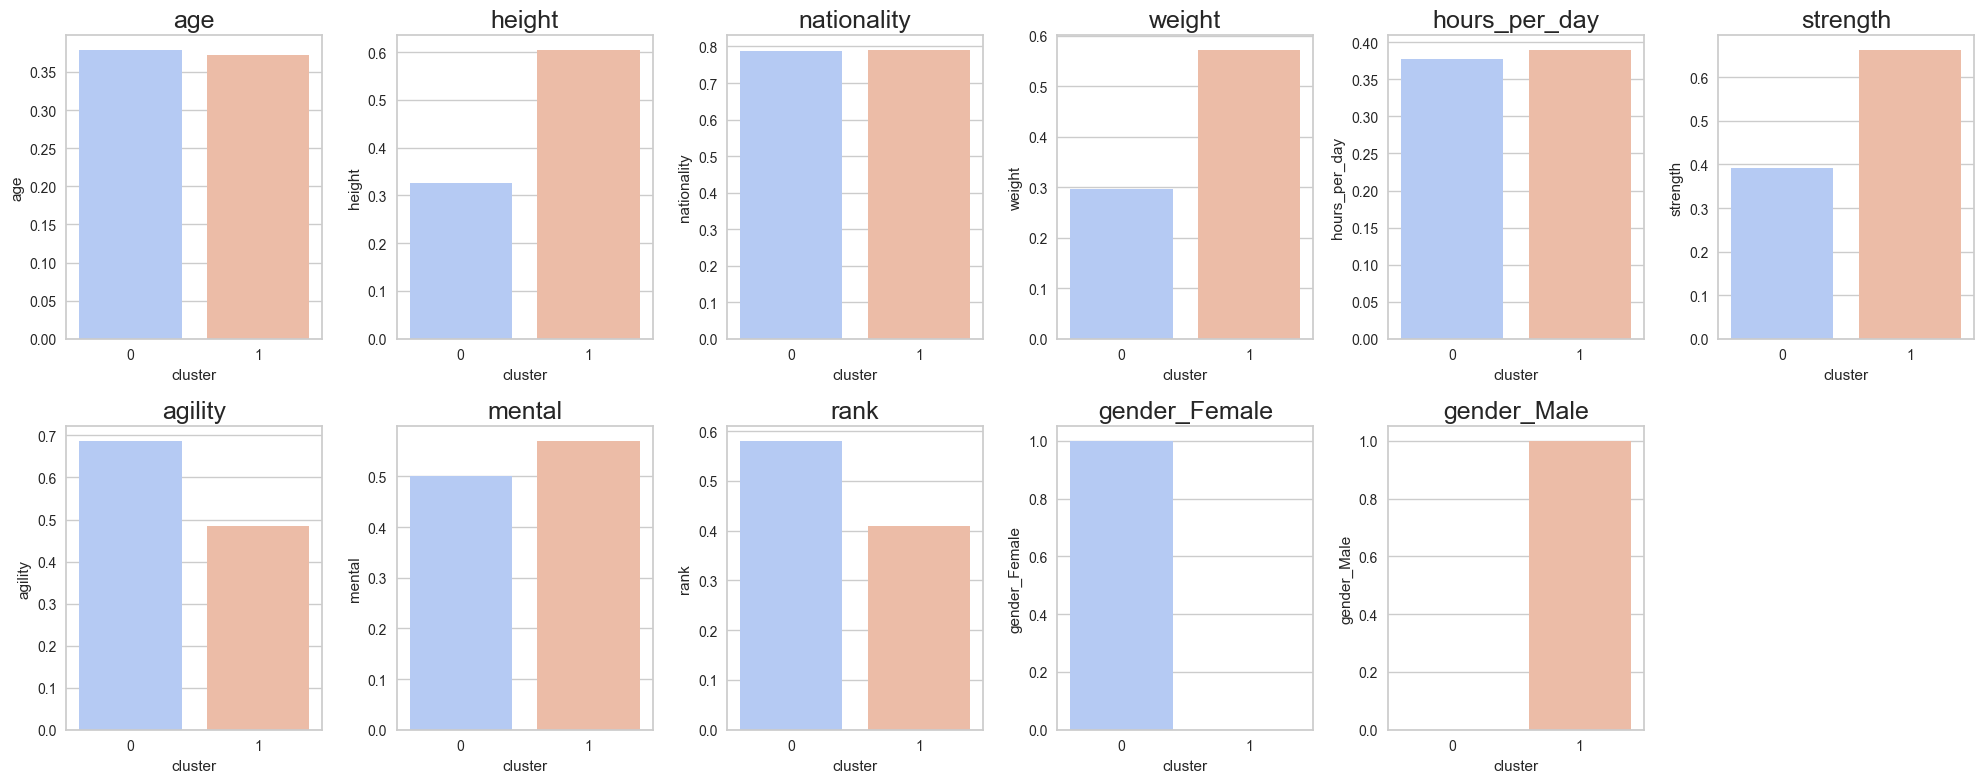

In [40]:
plot_clusters(df_agg)

Los clusters que ha hecho `AgglomerativeClustering` son iguales que los que habíamos obtenido con `KMeans`.

Veamos también el radar plot.

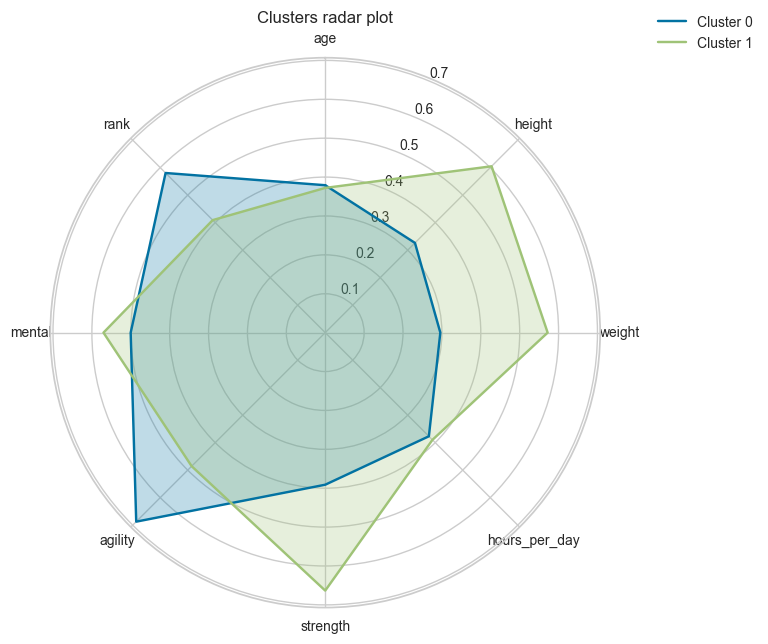

In [41]:
# Variables que deseas incluir en el radar plot
variables = ['age',
            'height',
            'weight',
            'hours_per_day',
            'strength',
            'agility',
            'mental',
            'rank']

plot_radar(df_agg, variables)

De nuevo son iguales

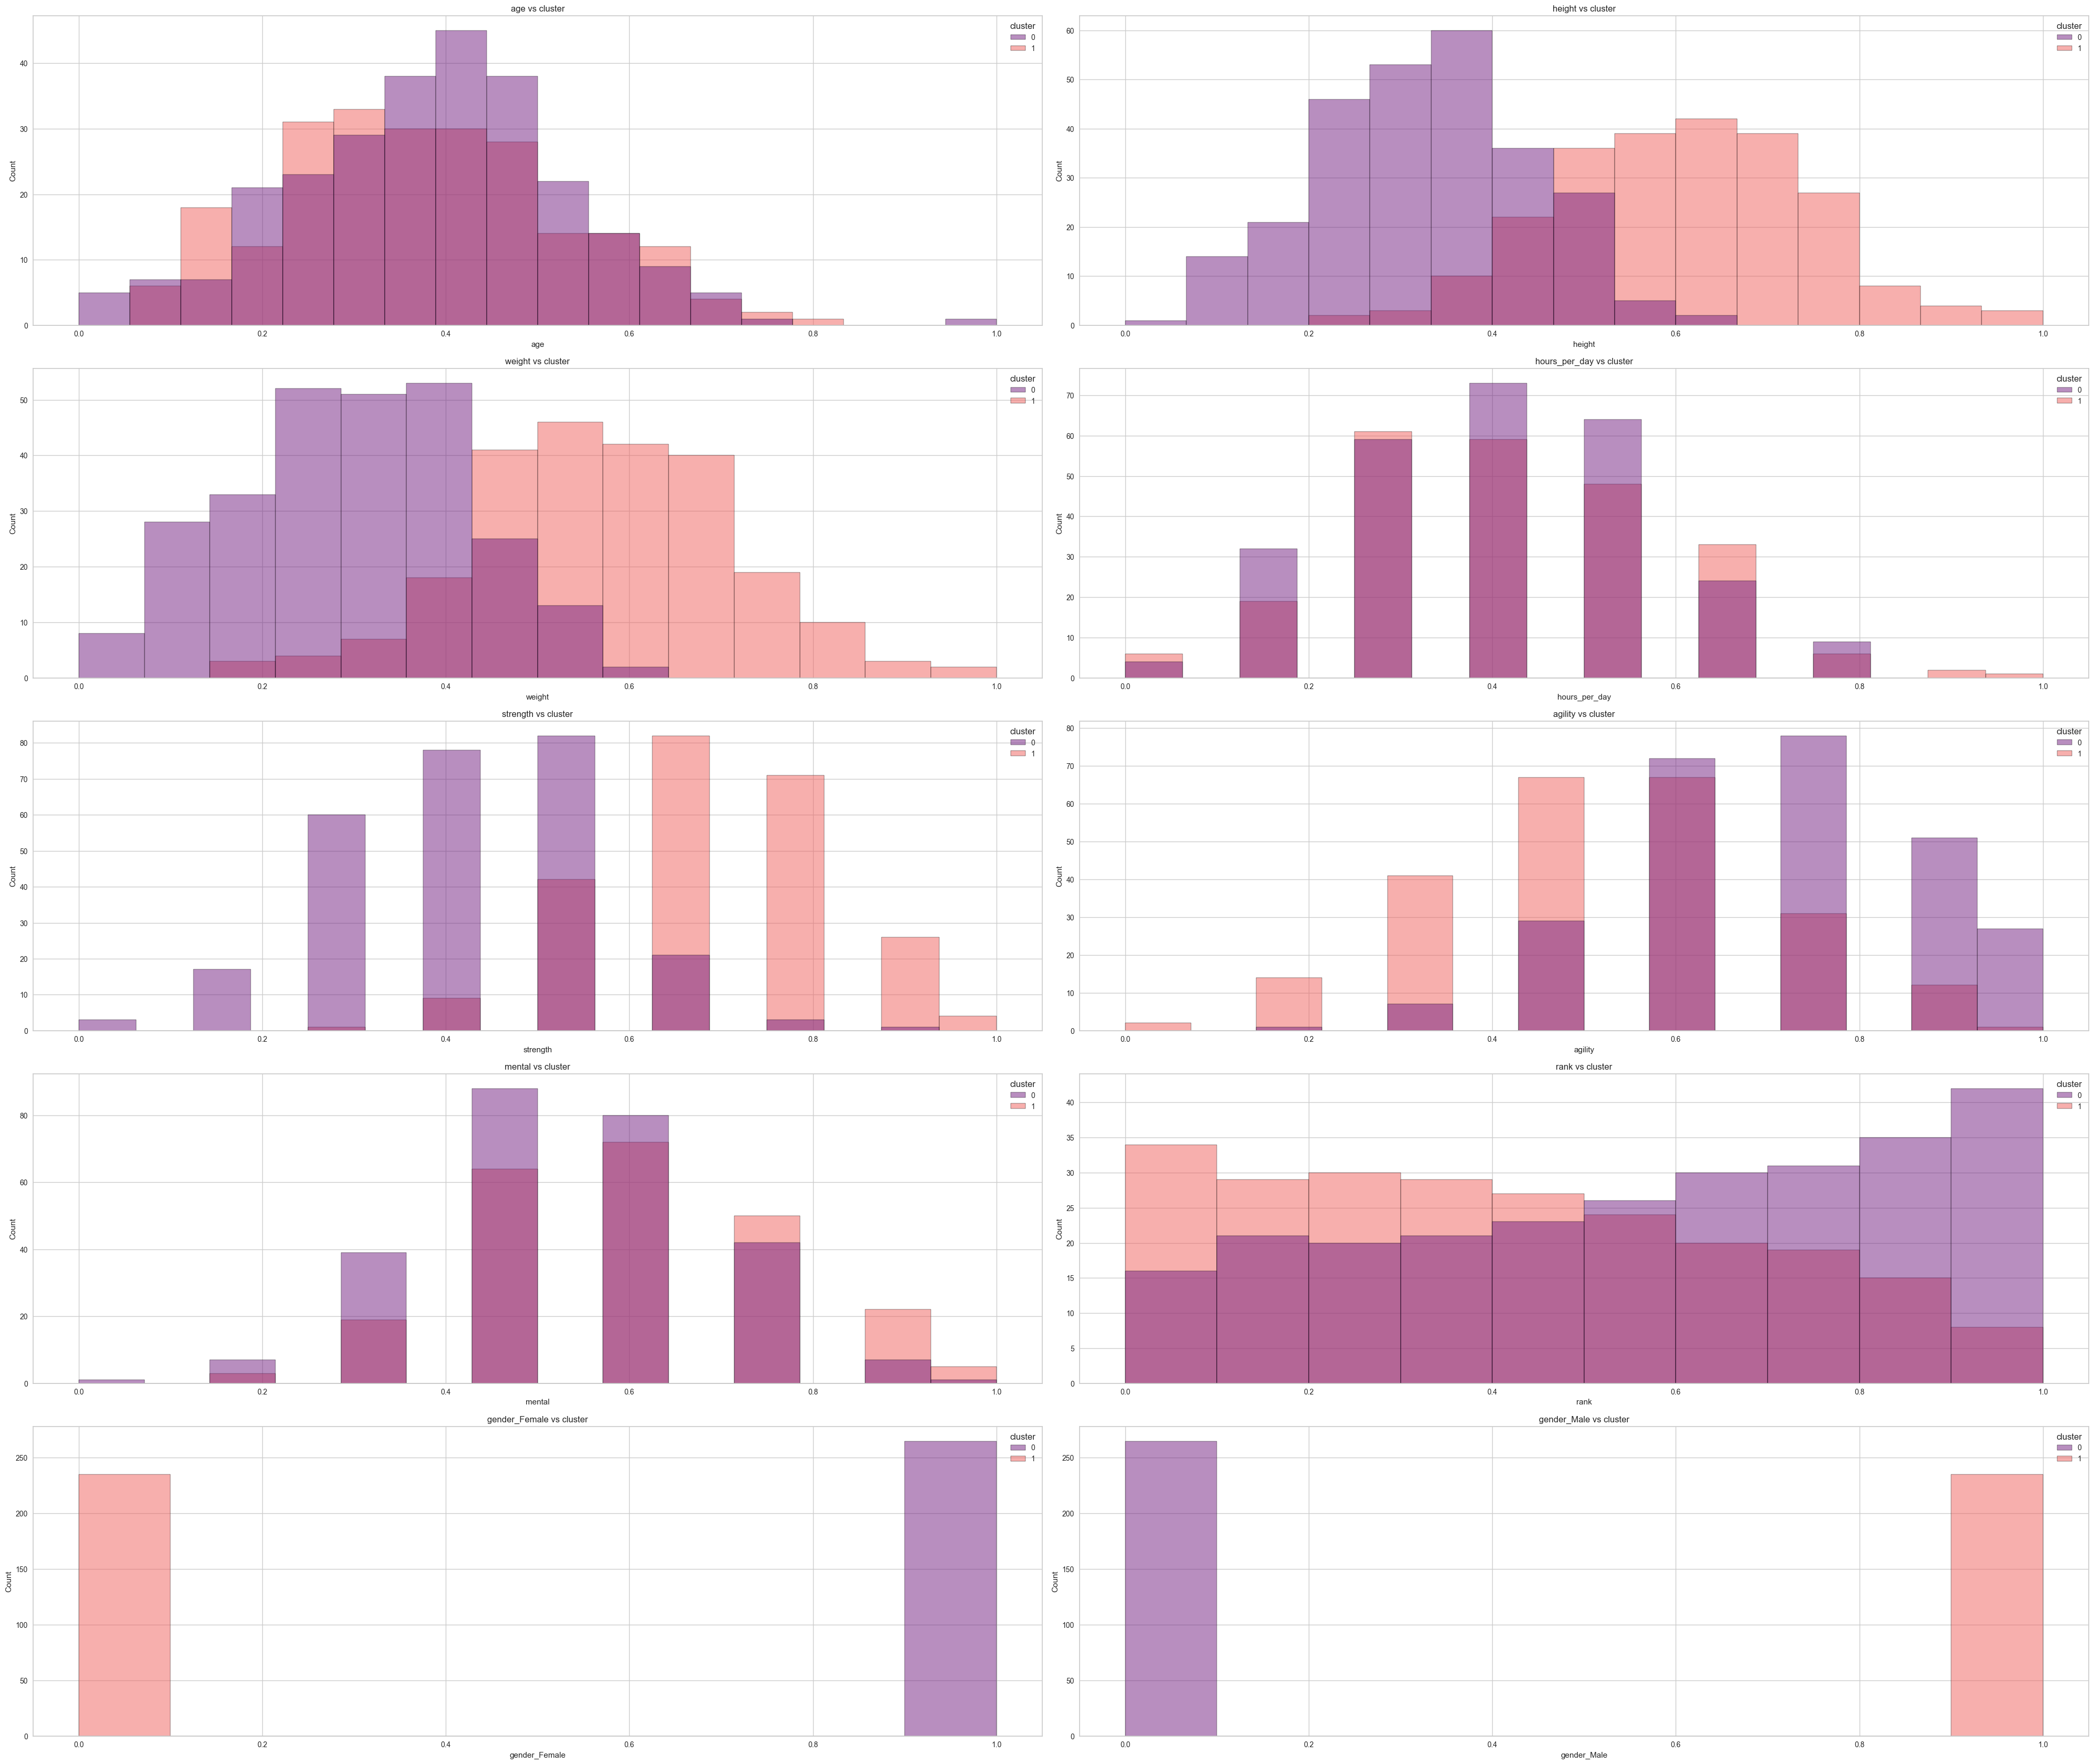

In [42]:
plot_relation_tv(df_agg.drop(columns=['nationality']), 'cluster', size=(40, 40), n_cols = 2)

Lo mismo

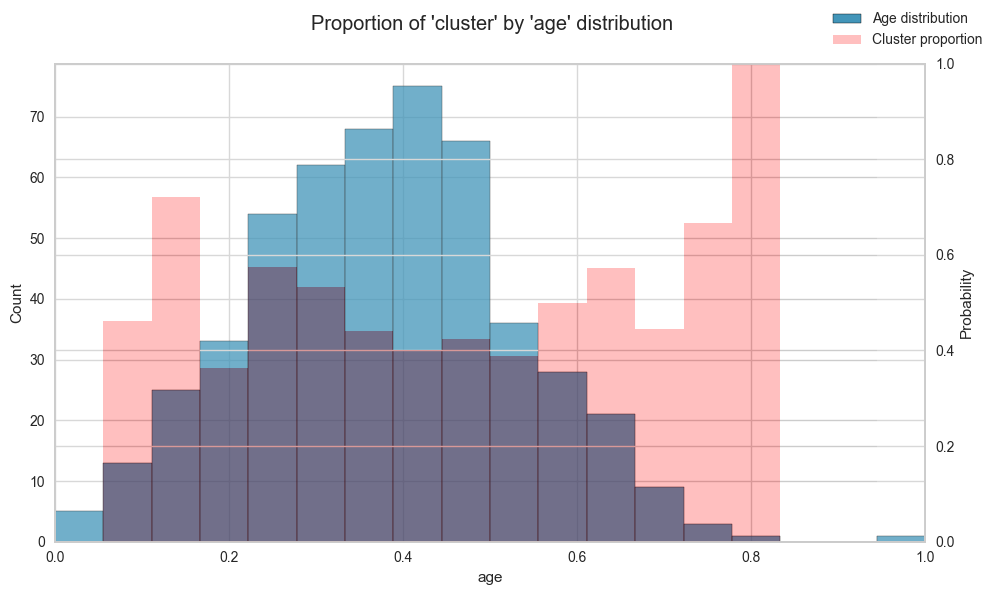

In [43]:
plot_combined_target_distribution(df_agg, 'cluster', 'age', size=(10, 6))

Idéntico